<a href="https://colab.research.google.com/github/pragati72448/Covid-19/blob/main/Capstone_Project_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
cv19 = pd.read_csv('/content/covid_19_clean_complete.csv', parse_dates = ['Date'])

In [ ]:
cv19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
cv19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
#Column Renaming
cv19.rename(columns = {'Date' : 'date', "Province/State" : "state", "Country/Region" : "country",
                       "Lat" : 'lat', "Long" : "long", 'Confirmed' : 'confirmed', 'Deaths' : 'deaths',
                       'Recovered' : 'recovered', 'Active' : 'active'}, inplace = True)

In [ ]:
cv19.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
#Finding the active cases
cv19['active'] = cv19['confirmed'] - cv19['deaths'] - cv19['recovered']

In [ ]:
world = cv19[cv19['date'] == '2020-07-27']
#this will give the data on how many countries had confirmed cases, revovered cases,active cases, and deaths in this particular day

In [ ]:
world

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
world.groupby('country')[['confirmed', 'deaths', 'recovered', 'active']].sum().reset_index()

,country,confirmed,deaths,recovered,active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
#Analysing cases with most recent data

In [ ]:
figure = px.choropleth(world, locations='country', locationmode = 'country names', hover_name= 'country',
                       color = 'active', range_color = [1,10000], color_continuous_scale = 'reds',
                       title = 'Countries with most Active Cases')
figure.show()

In [ ]:
#Analysing the death cases in the world with recent data

In [ ]:
figure = px.choropleth(world, locations='country', locationmode = 'country names', hover_name= 'country',
                       color = 'deaths', range_color = [1,10000], color_continuous_scale = 'purples',
                       title = 'Countries with most Death Cases')
figure.show()

In [ ]:
#Analysing the Confirmed Cases in the world with recent Data

In [ ]:
figure = px.choropleth(world, locations='country', locationmode = 'country names', hover_name= 'country',
                       color = 'confirmed', range_color = [1,10000], color_continuous_scale = 'blues',
                       title = 'Countries with most Confirmed Cases')
figure.show()

In [ ]:
#Analysing the Recovered Cases on world with recent data

In [ ]:
figure = px.choropleth(world, locations='country', locationmode = 'country names', hover_name= 'country',
                       color = 'recovered', range_color = [1,10000], color_continuous_scale = 'greens',
                       title = 'Countries with most Recovered Cases')
figure.show()

Trend of Active Cases in the World

In [ ]:
total_active_cases = cv19.groupby('date').sum().reset_index()[['date', 'active']]
total_active_cases

,date,active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


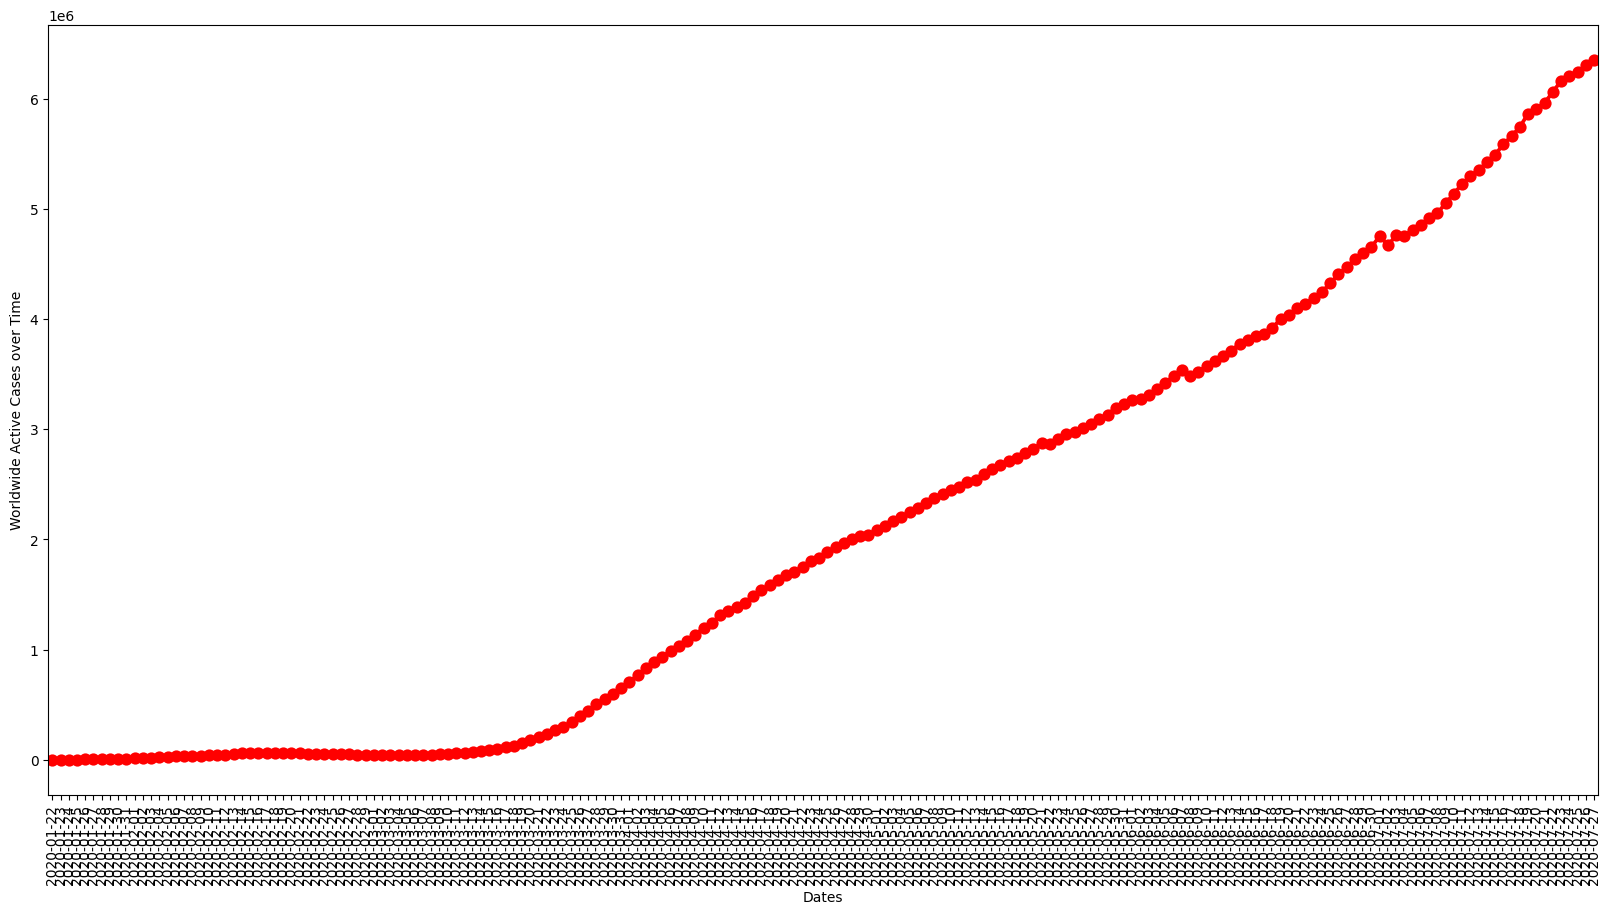

In [ ]:
plt.figure(figsize = (20,10))
plt.xlabel('Dates')
plt.xticks(rotation = 90)
plt.ylabel('Worldwide Active Cases over Time')
ax = sns.pointplot(x=total_active_cases.date, y=total_active_cases.active, color = 'r')

Trend of Confirmed Cases Worldwide

In [ ]:
total_confirmed_cases = cv19.groupby('date').sum().reset_index()[['date', 'confirmed']]
total_confirmed_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


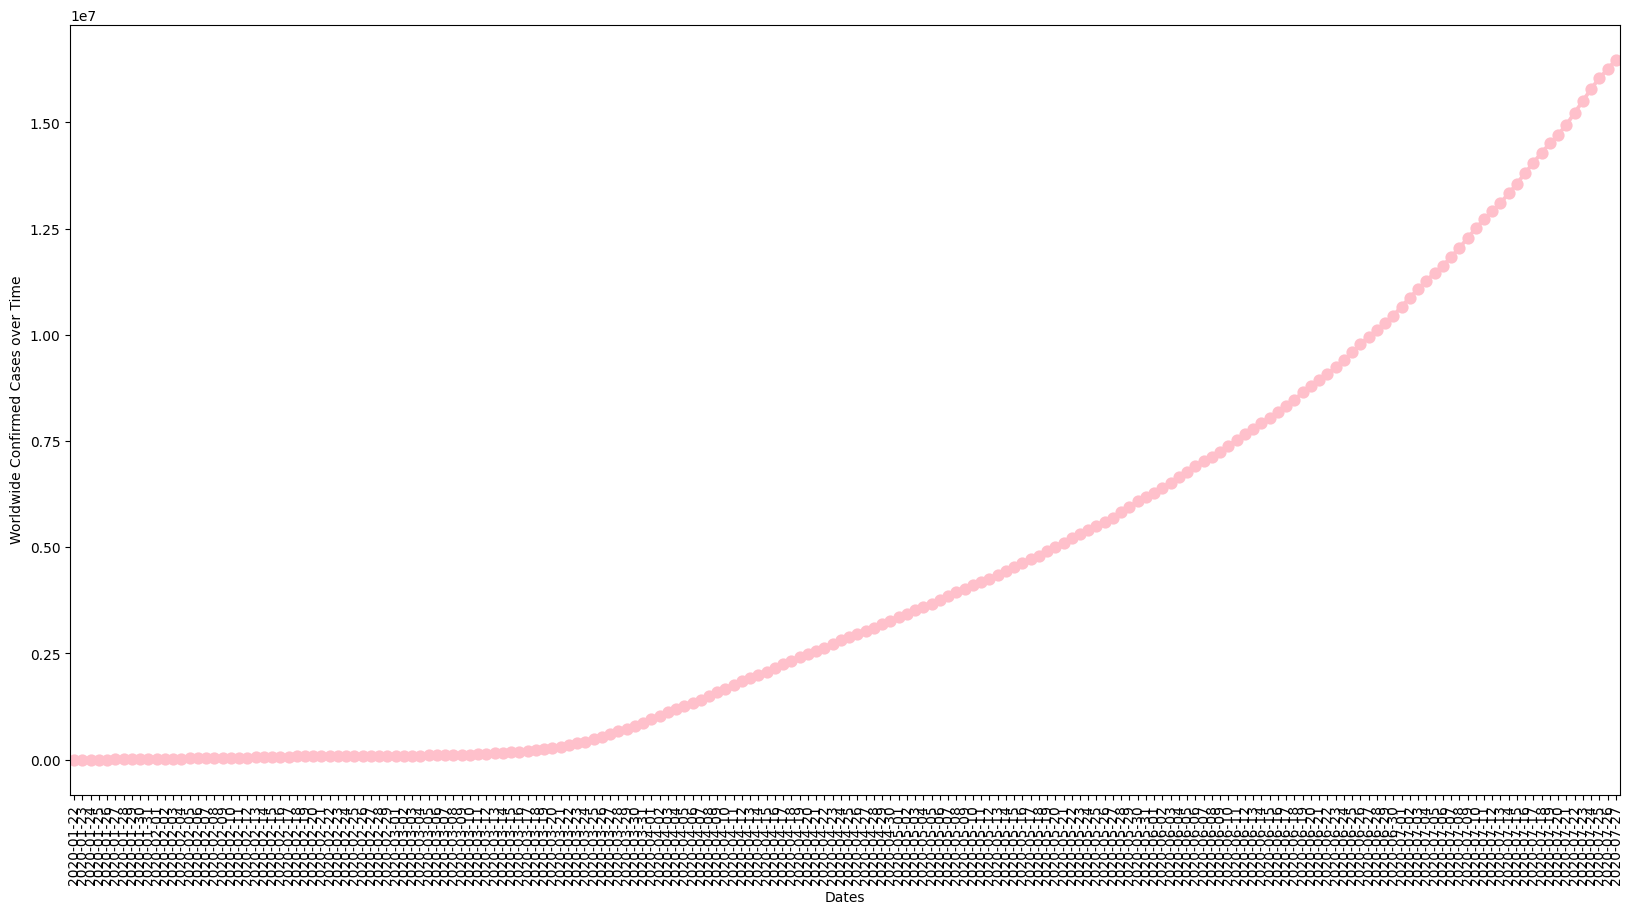

In [ ]:
plt.figure(figsize = (20,10))
plt.xlabel('Dates')
plt.xticks(rotation = 90)
plt.ylabel('Worldwide Confirmed Cases over Time')
ax = sns.pointplot(x=total_confirmed_cases.date, y=total_confirmed_cases.confirmed, color = 'pink')

Trend of Death Cases Worldwide

In [ ]:
total_death_cases = cv19.groupby('date').sum().reset_index()[['date', 'deaths']]
total_death_cases

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


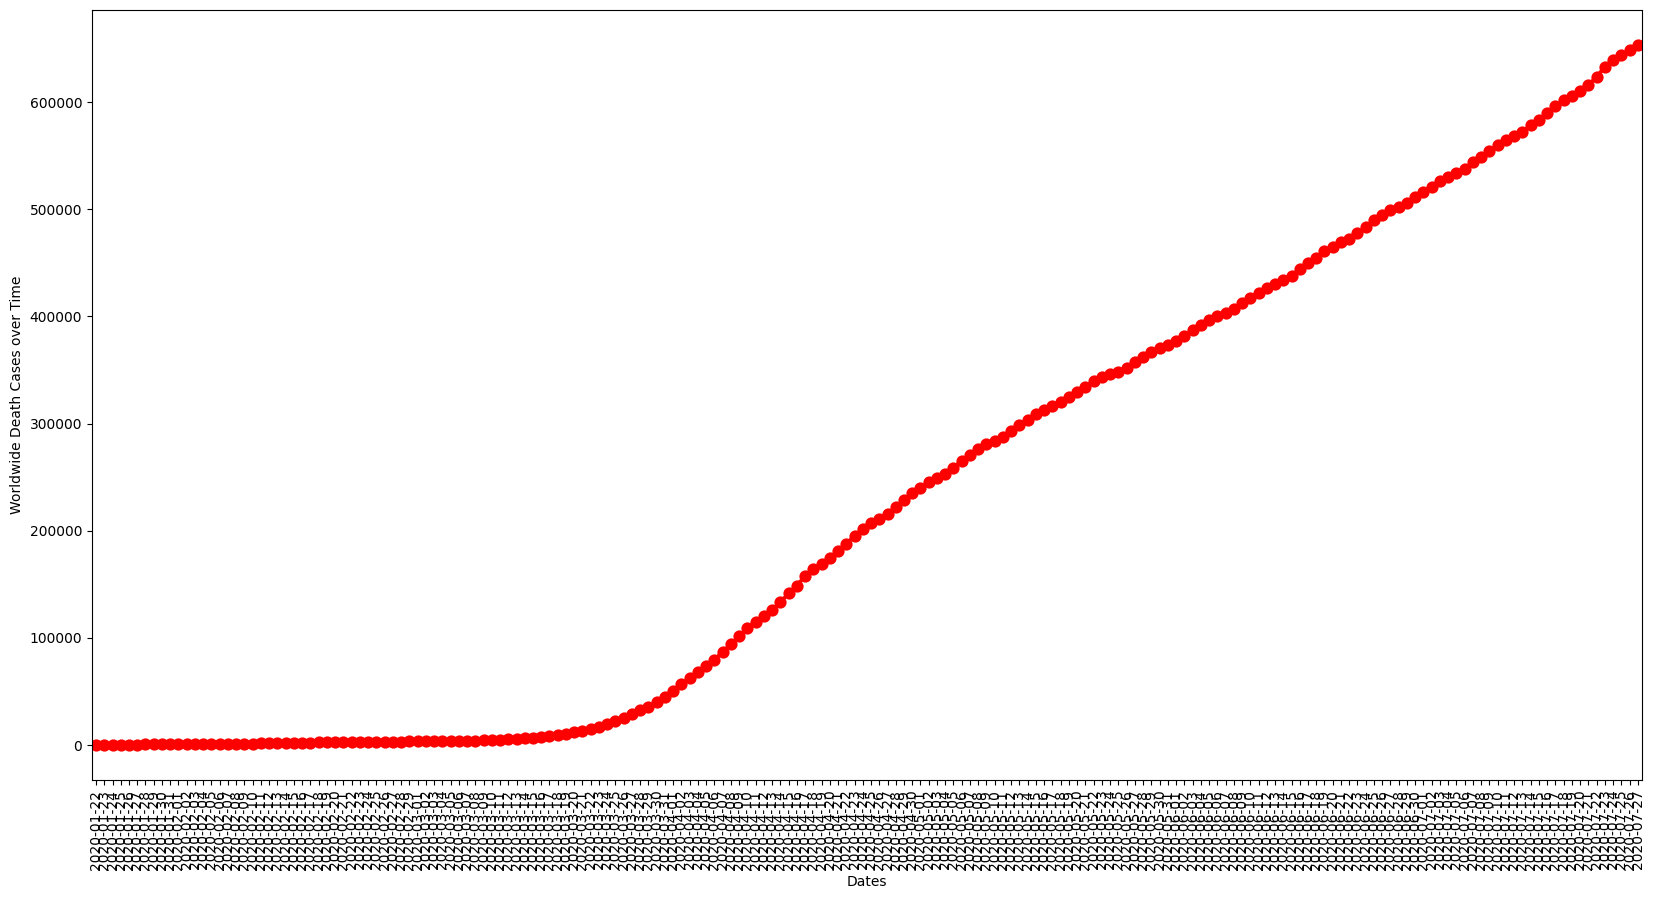

In [ ]:
plt.figure(figsize = (20,10))
plt.xlabel('Dates')
plt.xticks(rotation = 90)
plt.ylabel('Worldwide Death Cases over Time')
ax = sns.pointplot(x=total_death_cases.date, y=total_death_cases.deaths, color = 'red')

Trend of Recovering Cases Worldwide

In [ ]:
total_recovered_cases = cv19.groupby('date').sum().reset_index()[['date', 'recovered']]
total_recovered_cases

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


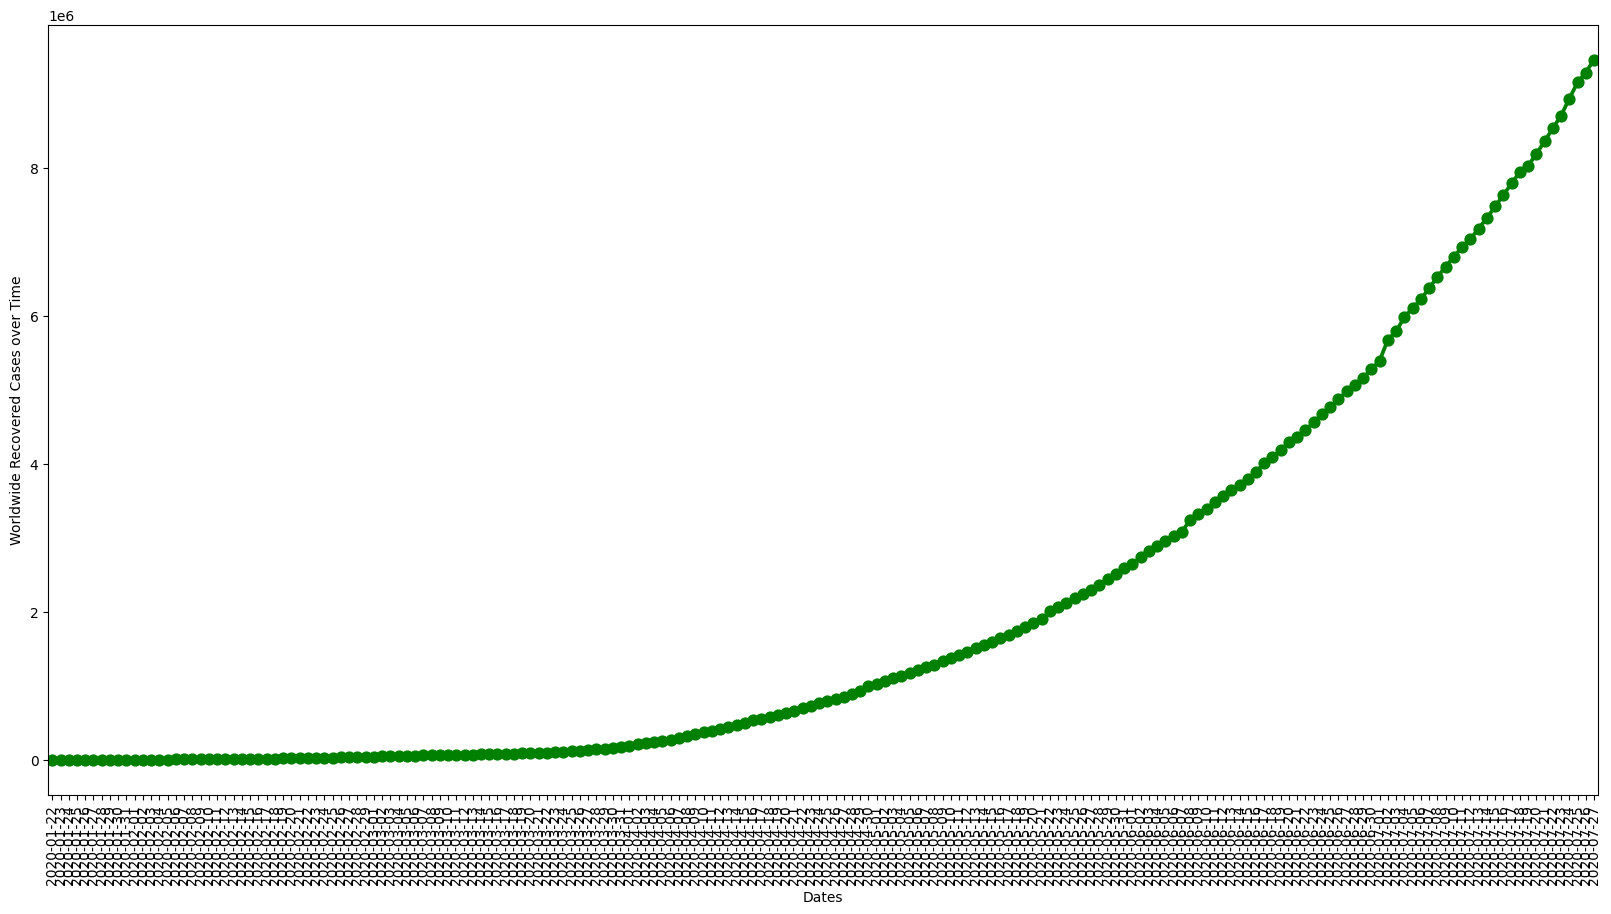

In [ ]:
plt.figure(figsize = (20,10))
plt.xlabel('Dates')
plt.xticks(rotation = 90)
plt.ylabel('Worldwide Recovered Cases over Time')
ax = sns.pointplot(x=total_recovered_cases.date, y=total_recovered_cases.recovered, color = 'green')

**Model Building**

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

As we are performing forecasting the number of cases worldwide, we need to group the data by date column

In [ ]:
Confirmed = cv19.groupby(['date'])['confirmed'].sum().reset_index()
Active = cv19.groupby(['date'])['active'].sum().reset_index()
Death = cv19.groupby(['date'])['deaths'].sum().reset_index()
Recovered = cv19.groupby(['date'])['recovered'].sum().reset_index()

In [ ]:
#since the facebook prophet has to be performed on two columns, and they're always named as x-axis(ds) and y-axis(y),
#we need to rename the column

Confirmed.rename(columns = {"date" : "ds", 'confirmed': 'y'}, inplace= True)
Confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
model = Prophet(interval_width = 0.95)
model.fit(Confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/barq1lpq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/dokkwgzz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52464', 'data', 'file=/tmp/tmpmjdn6rw9/barq1lpq.json', 'init=/tmp/tmpmjdn6rw9/dokkwgzz.json', 'output', 'file=/tmp/tmpmjdn6rw9/prophet_modelvj59fpej/prophet_model-20240909124822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:48:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:48:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_confirmed = model.make_future_dataframe(periods = 10)
future_confirmed

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05


In [ ]:
future_confirmed.tail(10)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05
197,2020-08-06


In [ ]:
forecast_C = model.predict(future_confirmed)

In [ ]:
forecast_C[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(15)

,ds,yhat_lower,yhat,yhat_upper
183,2020-07-23,1.514873e+07,1.531598e+07,1.547954e+07
184,2020-07-24,1.536925e+07,1.553116e+07,1.569511e+07
185,2020-07-25,1.558018e+07,1.573882e+07,1.590291e+07
186,2020-07-26,1.575918e+07,1.593636e+07,1.610241e+07
187,2020-07-27,1.596904e+07,1.613095e+07,1.629966e+07
188,2020-07-28,1.614928e+07,1.632020e+07,1.648026e+07
189,2020-07-29,1.636746e+07,1.652997e+07,1.669264e+07
190,2020-07-30,1.658943e+07,1.674391e+07,1.690193e+07
191,2020-07-31,1.679871e+07,1.695910e+07,1.710928e+07
192,2020-08-01,1.699240e+07,1.716676e+07,1.733535e+07


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



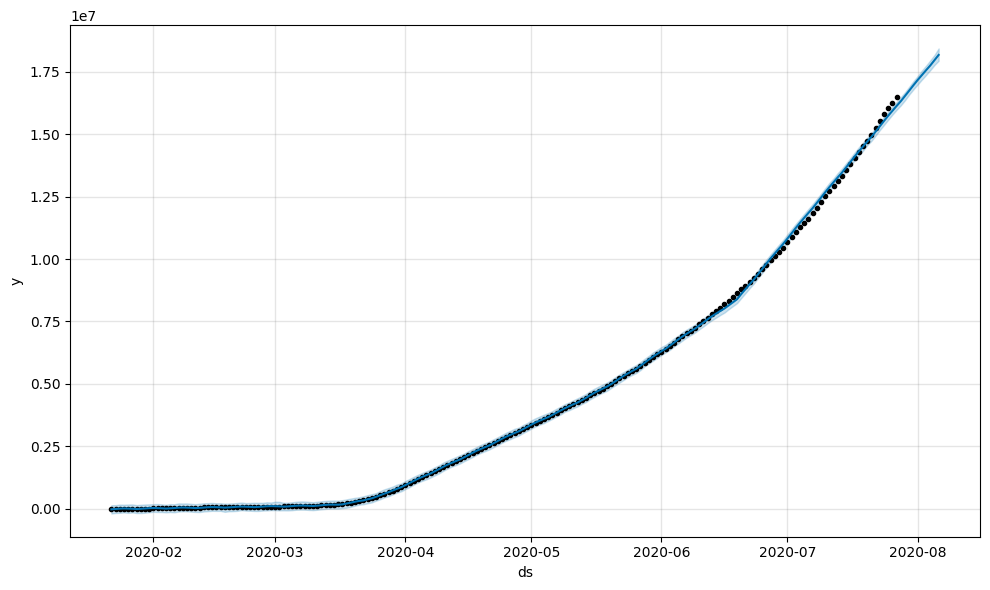

In [ ]:
confirmed_forecast_plot_model = model.plot(forecast_C)

The black dots in the above graph show the actual values, whereas the blue line shows the predicted value. This shows the possible values of confirmed cases for the next 10 days.

Similarly let us predict the number of active cases for over next 10 days.

In [ ]:
#renaming the Active columns just like we did on the Confirmed columns

Active.rename(columns= {'date' : 'ds', 'active' : 'y'}, inplace= True)
Active

,ds,y
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [ ]:
model = Prophet(interval_width = 0.95)
model.fit(Active)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/3drvf59o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/z244bhsd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74089', 'data', 'file=/tmp/tmpmjdn6rw9/3drvf59o.json', 'init=/tmp/tmpmjdn6rw9/z244bhsd.json', 'output', 'file=/tmp/tmpmjdn6rw9/prophet_modelxh5s2rfk/prophet_model-20240909131255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_active = model.make_future_dataframe(periods = 10)
future_active

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05


In [ ]:
future_active.tail(10)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05
197,2020-08-06


In [ ]:
forecast_A = model.predict(future_active)

In [ ]:
forecast_A[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(15)

,ds,yhat_lower,yhat,yhat_upper
183,2020-07-23,5.980287e+06,6.045402e+06,6.119315e+06
184,2020-07-24,6.045063e+06,6.113443e+06,6.183736e+06
185,2020-07-25,6.108818e+06,6.175608e+06,6.246160e+06
186,2020-07-26,6.169279e+06,6.242899e+06,6.310036e+06
187,2020-07-27,6.222781e+06,6.296649e+06,6.363231e+06
188,2020-07-28,6.288362e+06,6.353415e+06,6.421488e+06
189,2020-07-29,6.346229e+06,6.415815e+06,6.490113e+06
190,2020-07-30,6.409161e+06,6.481274e+06,6.543340e+06
191,2020-07-31,6.470466e+06,6.549315e+06,6.622645e+06
192,2020-08-01,6.539873e+06,6.611480e+06,6.684455e+06


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



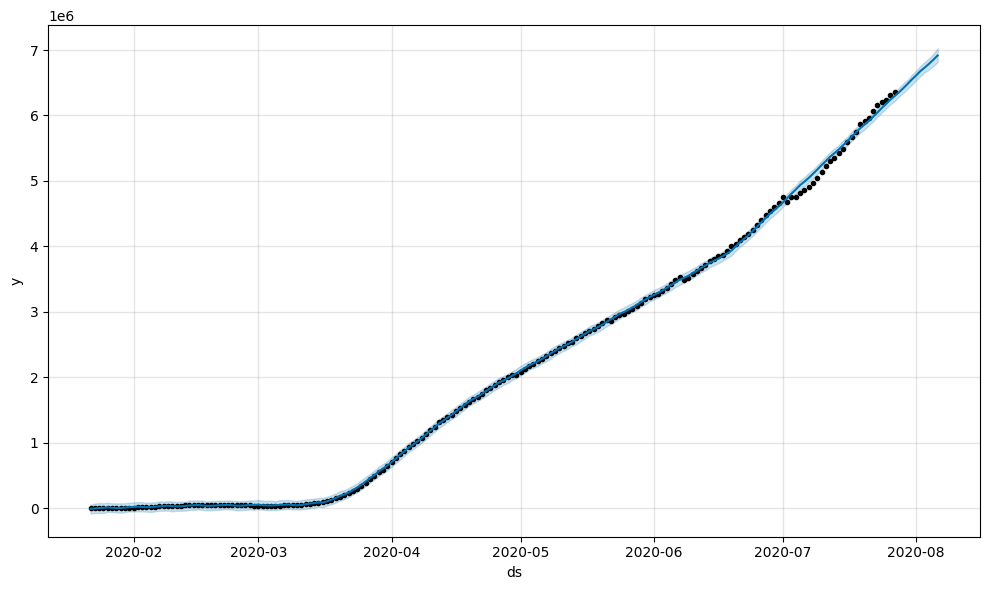

In [ ]:
activecases_forecast_plot_model = model.plot(forecast_A)

The above graph suggests that the blue line here will help predict the the number of active cases in the next 10 days

Now lets predict the death cases for the next 10 days

In [ ]:
#renaming the columns
Death.rename(columns= {'date' : 'ds', 'deaths' : 'y'}, inplace= True)
Death

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
model = Prophet(interval_width = 0.95)
model.fit(Death)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/x_je1ll3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/k1aiorxk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53906', 'data', 'file=/tmp/tmpmjdn6rw9/x_je1ll3.json', 'init=/tmp/tmpmjdn6rw9/k1aiorxk.json', 'output', 'file=/tmp/tmpmjdn6rw9/prophet_modelajfkfybc/prophet_model-20240909133657.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_death = model.make_future_dataframe(periods = 10)
future_death

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05


In [ ]:
future_death.tail(10)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05
197,2020-08-06


In [ ]:
forecast_D = model.predict(future_death)
forecast_D[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(15)

,ds,yhat_lower,yhat,yhat_upper
183,2020-07-23,625276.124474,628285.543688,631236.773969
184,2020-07-24,630733.809394,633800.542350,636872.688648
185,2020-07-25,635901.994881,638682.574995,641791.113419
186,2020-07-26,639933.179573,642819.493058,645951.614724
187,2020-07-27,644135.644247,647109.807437,650047.750307
188,2020-07-28,649455.456164,652315.566446,655407.968589
189,2020-07-29,654649.014228,657882.129102,660957.907750
190,2020-07-30,660256.057265,663491.395651,666788.083619
191,2020-07-31,665376.293419,669006.394312,672274.191167
192,2020-08-01,669984.468087,673888.426957,678356.713509


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



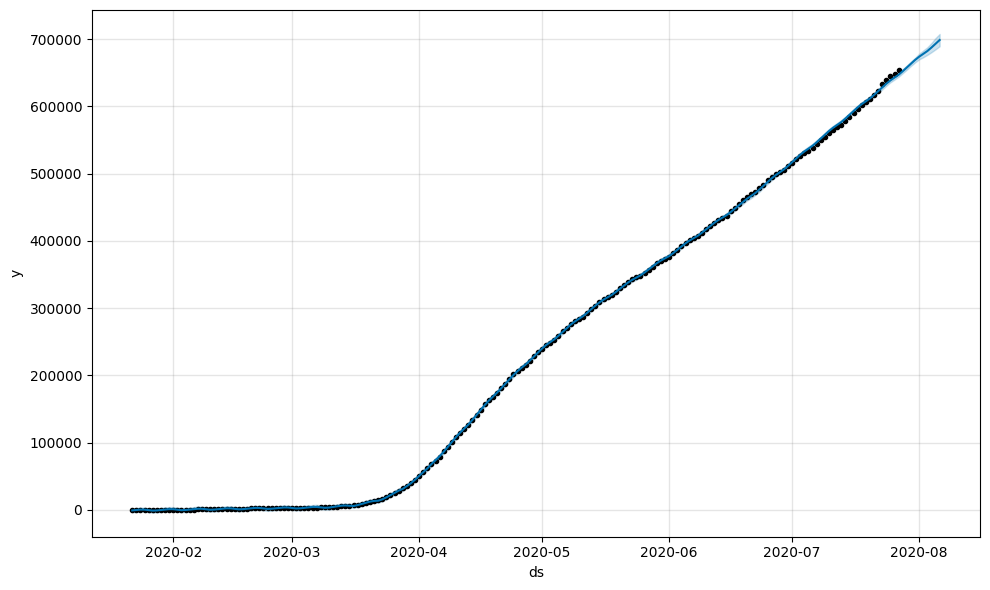

In [ ]:
death_forecast_plot_model = model.plot(forecast_D)

The Blue line here indicates the possible values of deaths in next 10 days

In [ ]:
#renaming the columns
Recovered.rename(columns={'date':'ds', 'recovered':'y'}, inplace= True)

In [ ]:
model = Prophet(interval_width = 0.95)
model.fit(Recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/ilbkfrj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmjdn6rw9/8ltqvj4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38368', 'data', 'file=/tmp/tmpmjdn6rw9/ilbkfrj1.json', 'init=/tmp/tmpmjdn6rw9/8ltqvj4m.json', 'output', 'file=/tmp/tmpmjdn6rw9/prophet_modelvsfoa5sy/prophet_model-20240909134359.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:43:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:44:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_recovered = model.make_future_dataframe(periods = 10)
future_recovered

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05


In [ ]:
future_recovered.tail(10)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03
195,2020-08-04
196,2020-08-05
197,2020-08-06


In [ ]:
forecast_R = model.predict(future_recovered)
forecast_R[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(15)

,ds,yhat_lower,yhat,yhat_upper
183,2020-07-23,8.525463e+06,8.639879e+06,8.750183e+06
184,2020-07-24,8.656974e+06,8.781278e+06,8.902869e+06
185,2020-07-25,8.786696e+06,8.921439e+06,9.045646e+06
186,2020-07-26,8.937349e+06,9.047414e+06,9.163757e+06
187,2020-07-27,9.068281e+06,9.183914e+06,9.310814e+06
188,2020-07-28,9.195740e+06,9.311028e+06,9.431277e+06
189,2020-07-29,9.328588e+06,9.453130e+06,9.574204e+06
190,2020-07-30,9.478090e+06,9.595783e+06,9.733475e+06
191,2020-07-31,9.611530e+06,9.737182e+06,9.862624e+06
192,2020-08-01,9.752065e+06,9.877343e+06,9.991942e+06


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



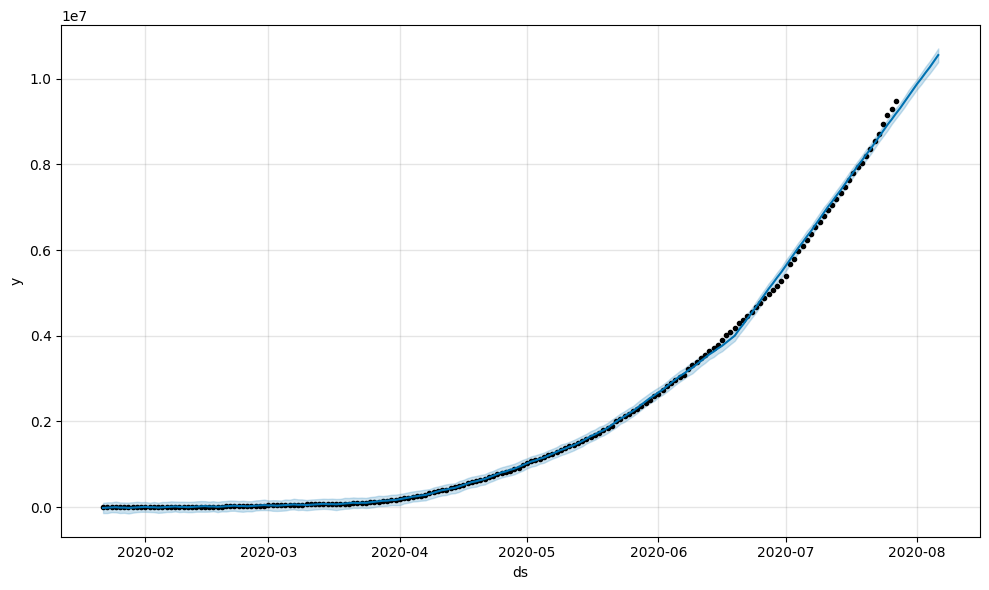

In [ ]:
recoveredcases_forecast_plot_model = model.plot(forecast_R)

The blue line here indicates the possible cases of recovery in next 10 days